In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
np.int=int
df=pd.read_csv("/content/Student_Performance.csv")
df.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91
1,4,82,No,4,2,65
2,8,51,Yes,7,2,45
3,5,52,Yes,5,2,36
4,7,75,No,8,5,66


In [ ]:
df.shape

(10000, 6)

In [ ]:
df.isnull().sum()

Hours Studied                       0
Previous Scores                     0
Extracurricular Activities          0
Sleep Hours                         0
Sample Question Papers Practiced    0
Performance Index                   0
dtype: int64

In [ ]:
df.describe()

,Hours Studied,Previous Scores,Sleep Hours,Sample Question Papers Practiced,Performance Index
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,4.992900,69.445700,6.530600,4.583300,55.224800
std,2.589309,17.343152,1.695863,2.867348,19.212558
min,1.000000,40.000000,4.000000,0.000000,10.000000
25%,3.000000,54.000000,5.000000,2.000000,40.000000
50%,5.000000,69.000000,7.000000,5.000000,55.000000
75%,7.000000,85.000000,8.000000,7.000000,71.000000
max,9.000000,99.000000,9.000000,9.000000,100.000000


<Axes: >

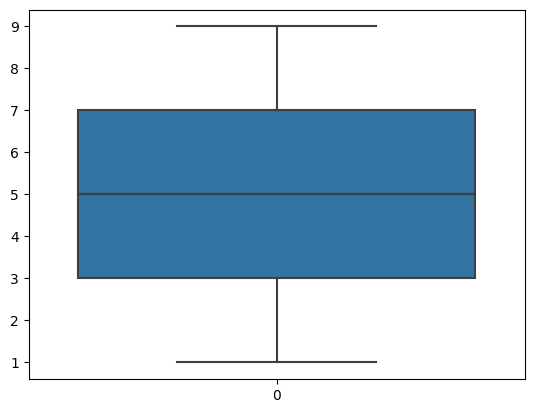

In [ ]:
sns.boxplot(df['Hours Studied'])

<Axes: >

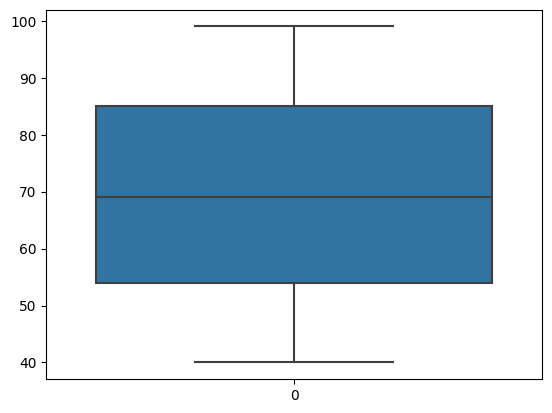

In [ ]:
sns.boxplot(df['Previous Scores'])

In [ ]:
sns.boxplot(df['Sleep Hours'])

<Axes: >

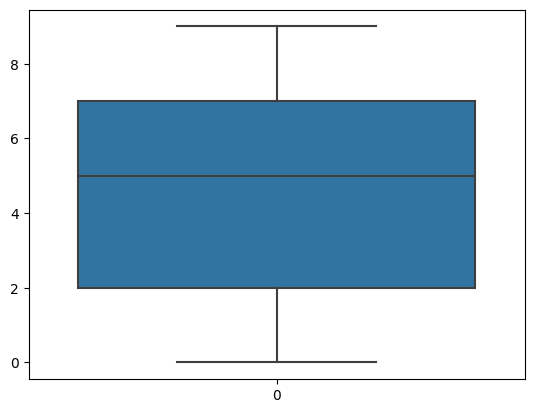

In [ ]:
sns.boxplot(df['Sample Question Papers Practiced'])

In [ ]:
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,r2_score
#converting categorical variables into numeric variables
encoder = LabelEncoder()
df["Extracurricular Activities"] = encoder.fit_transform(df["Extracurricular Activities"])
df.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,1,9,1,91.0
1,4,82,0,4,2,65.0
2,8,51,1,7,2,45.0
3,5,52,1,5,2,36.0
4,7,75,0,8,5,66.0


In [ ]:
Train = df.drop(columns = "Performance Index")
Target = df["Performance Index"]
Train.head()


,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced
0,7,99,1,9,1
1,4,82,0,4,2
2,8,51,1,7,2
3,5,52,1,5,2
4,7,75,0,8,5


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(Train, Target, test_size = 0.2, random_state=42)

In [ ]:
from sklearn.ensemble import RandomForestRegressor #using random forest
model = RandomForestRegressor()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
pd.DataFrame({"Actual Performance" : y_test, "Predicted Performance" : y_pred})

,Actual Performance,Predicted Performance
6252,51,56.310000
4684,20,22.020000
1731,46,46.150000
4742,28,29.021333
4521,41,42.547500
...,...,...
6412,45,47.380000
8285,66,64.330000
7853,16,15.740000
1095,65,63.401500


In [ ]:
r2_score(y_test,y_pred)


0.9859939541121207

In [ ]:
model = LinearRegression() #using linear regression
model.fit(X_train,y_train)
predict = np.round(model.predict(X_test))
pd.DataFrame({"Actual Performance" : y_test, "Predicted Performance" : predict})


,Actual Performance,Predicted Performance
6252,51,55.0
4684,20,23.0
1731,46,48.0
4742,28,31.0
4521,41,43.0
...,...,...
6412,45,47.0
8285,66,63.0
7853,16,17.0
1095,65,63.0


In [ ]:
r2_score(y_test,predict)

0.9886800634486357

In [ ]:
from sklearn.tree import DecisionTreeRegressor #using decision trees
model = DecisionTreeRegressor()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
pd.DataFrame({"Actual Performance" : y_test, "Predicted Performance" : y_pred})

,Actual Performance,Predicted Performance
6252,51.0,57.0
4684,20.0,24.0
1731,46.0,45.0
4742,28.0,27.0
4521,41.0,45.0
...,...,...
6412,45.0,48.0
8285,66.0,62.0
7853,16.0,18.0
1095,65.0,61.5


In [ ]:
r2_score(y_test,y_pred)

0.9764799122573383